In [10]:
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

In [41]:
train = pd.read_csv('train.csv' ,parse_dates=['date'],index_col='date')
test = pd.read_csv('test.csv', parse_dates=['date'],index_col='date')
df = pd.concat([train,test],sort=True)
print(train.head())
print(test.head())

            store  item  sales
date                          
2013-01-01      1     1     13
2013-01-02      1     1     11
2013-01-03      1     1     14
2013-01-04      1     1     13
2013-01-05      1     1     10
            id  store  item
date                       
2018-01-01   0      1     1
2018-01-02   1      1     1
2018-01-03   2      1     1
2018-01-04   3      1     1
2018-01-05   4      1     1


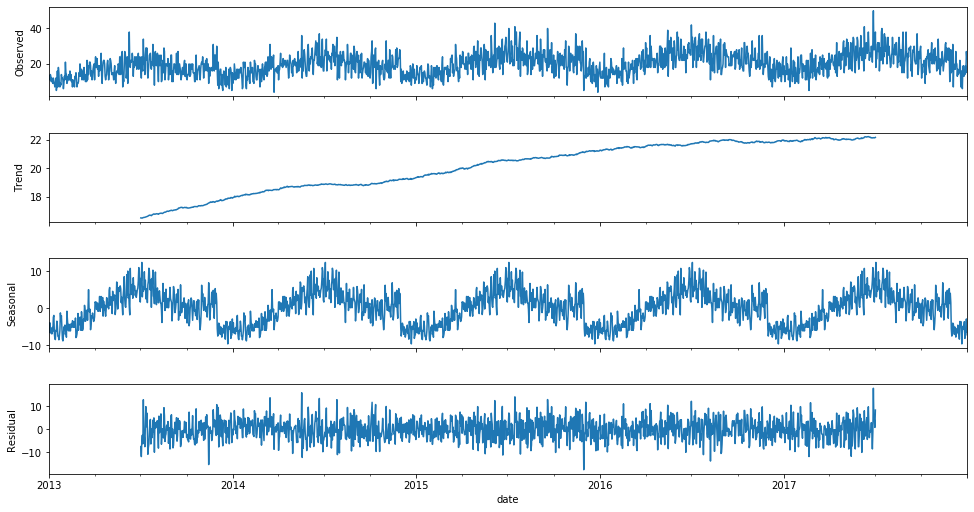

In [42]:
buf = test[(test.item==1)&(test.store==1)].copy()
res = sm.tsa.seasonal_decompose(buf.sales.dropna(),freq=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)

In [19]:
train = pd.read_csv('train.csv' ,parse_dates=['date'],index_col='date')
test = pd.read_csv('test.csv', parse_dates=['date'],index_col='date')
df = pd.concat([train,test],sort=True)


In [20]:
#month one hot encoding
df['month'] = df.index.month
month_dummies = pd.get_dummies(df['month'])
month_dummies.columns = ['month-'+ str(m) for m in range(1,13)]
df = pd.concat([df, month_dummies], axis=1, join_axes=[df.index]).drop(['month'],axis=1)
#dayofweek one hot encoding
df['dayofweek'] = df.index.weekday
week_dummies = pd.get_dummies(df['dayofweek'])
week_dummies.columns = ['dayofweek-'+ str(w) for w in range(0,7)]
df = pd.concat([df, week_dummies], axis=1, join_axes=[df.index]).drop(['dayofweek'],axis=1)
#Satday,Sunday
df['weekend'] = (df.index.dayofweek>4).astype(int)#Satday,Sunday

#shifts
shifts = [364,728]
for s in shifts:
    df['store_item_shifted-'+str(s)] = df.groupby(["item","store"])['sales'].transform(lambda x:x.shift(s))

C:\Users\magic\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """
C:\Users\magic\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  # Remove the CWD from sys.path while we load stuff.


In [21]:
df.to_csv("temp.csv")

PermissionError: [Errno 13] Permission denied

In [ ]:
results = []
tr_start,tr_end = '2015-01-01','2017-09-30'
te_start,te_end = '2017-10-01','2017-12-31'
for i in range(1,51):
    for s in range(1,11):
        buf = df[(df.item==i)&(df.store==s)].copy()
        #buf['sales_shifted_728'] = buf.sales.shift(728)
        #buf['sales_shifted_364'] = buf.sales.shift(364)
        #target_exog = buf[~buf.id.isnull()].drop(['id','store','item','sales'],axis = 1)#exog for predict.
        target_exog = buf[te_start:].drop(['id','store','item','sales'],axis = 1)#exog for predict.
        
        #train_test_split
        tra = buf['sales'][tr_start:tr_end]#.dropna()
        tes = buf['sales'][te_start:te_end]#.dropna()
        exog_train = buf.drop(['id','store','item','sales'],axis = 1)[tr_start:tr_end]#.dropna()
        #exog_test = buf.drop(['id','store','item','sales'],axis = 1)[te_start:te_end]#.dropna()
        
        #fitting
        mod = sm.tsa.statespace.SARIMAX(tra,order=(7,1,7),seasonal_order=(0,0,0,0),exog = exog_train,freq='D',
                                       enforce_stationarity=False, enforce_invertibility=False).fit()
        pred = mod.get_prediction(tr_end,'2018-03-31',exog =target_exog)#pd.concat([exog_test,target_exog]))
        results.extend(pred.predicted_mean['2018-01-01':])
        print('item:',i,'store:',s,'Finished.')

C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 1 store: 1 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 1 store: 2 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 1 store: 3 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 1 store: 4 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 1 store: 5 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 1 store: 6 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 1 store: 7 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 1 store: 8 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 1 store: 9 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 1 store: 10 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 2 store: 1 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 2 store: 2 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 2 store: 3 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 2 store: 4 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 2 store: 5 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 2 store: 6 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 2 store: 7 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 2 store: 8 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 2 store: 9 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 2 store: 10 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 3 store: 1 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 3 store: 2 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 3 store: 3 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 3 store: 4 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 3 store: 5 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 3 store: 6 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 3 store: 7 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 3 store: 8 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 3 store: 9 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 3 store: 10 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 4 store: 1 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 4 store: 2 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 4 store: 3 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 4 store: 4 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 4 store: 5 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 4 store: 6 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 4 store: 7 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 4 store: 8 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 4 store: 9 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 4 store: 10 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 5 store: 1 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 5 store: 2 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 5 store: 3 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 5 store: 4 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 5 store: 5 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 5 store: 6 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 5 store: 7 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 5 store: 8 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 5 store: 9 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 5 store: 10 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 6 store: 1 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 6 store: 2 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 6 store: 3 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 6 store: 4 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 6 store: 5 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 6 store: 6 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 6 store: 7 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 6 store: 8 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 6 store: 9 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 6 store: 10 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 7 store: 1 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 7 store: 2 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 7 store: 3 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 7 store: 4 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 7 store: 5 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 7 store: 6 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 7 store: 7 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 7 store: 8 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 7 store: 9 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 7 store: 10 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 8 store: 1 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 8 store: 2 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 8 store: 3 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 8 store: 4 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 8 store: 5 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 8 store: 6 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 8 store: 7 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 8 store: 8 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 8 store: 9 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 8 store: 10 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 9 store: 1 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 9 store: 2 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 9 store: 3 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 9 store: 4 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 9 store: 5 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 9 store: 6 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 9 store: 7 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 9 store: 8 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 9 store: 9 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 9 store: 10 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 10 store: 1 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 10 store: 2 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 10 store: 3 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 10 store: 4 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 10 store: 5 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 10 store: 6 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 10 store: 7 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 10 store: 8 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 10 store: 9 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 10 store: 10 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 11 store: 1 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 11 store: 2 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 11 store: 3 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 11 store: 4 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 11 store: 5 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 11 store: 6 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 11 store: 7 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 11 store: 8 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 11 store: 9 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 11 store: 10 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 12 store: 1 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 12 store: 2 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 12 store: 3 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 12 store: 4 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 12 store: 5 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 12 store: 6 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 12 store: 7 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 12 store: 8 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 12 store: 9 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 12 store: 10 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 13 store: 1 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 13 store: 2 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 13 store: 3 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 13 store: 4 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 13 store: 5 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 13 store: 6 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 13 store: 7 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 13 store: 8 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 13 store: 9 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 13 store: 10 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 14 store: 1 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 14 store: 2 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 14 store: 3 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 14 store: 4 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 14 store: 5 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 14 store: 6 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 14 store: 7 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 14 store: 8 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 14 store: 9 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 14 store: 10 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 15 store: 1 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 15 store: 2 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 15 store: 3 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 15 store: 4 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 15 store: 5 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 15 store: 6 Finished.


C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


item: 15 store: 7 Finished.


In [ ]:
sample = pd.read_csv('sample_submission.csv')
sample['sales'] = results
sample.to_csv('submission.csv',index=False)

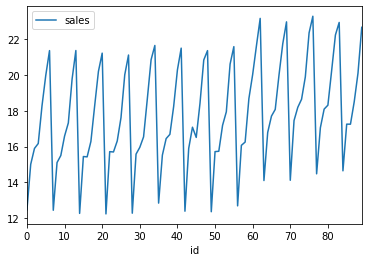

In [18]:
%matplotlib inline
import pandas as pd 
df=pd.read_csv('submission.csv')
df=df.set_index('id')
df=df.iloc[:90]
df.plot()